# Chapter 4: Error propagation
In this chapter, we present the various formulas for propating errors. We will motivate the origin of these formulas in later chapters, after covering the properties of the Normal distribution.

## 4.1 The Min-Max method
We start with example 4-3, where we use the Min-Max method numerically to find the best estimate and uncertainty in the function:
$F(x,y)=\sin(x+\log y)$ 

In [2]:
#Example 4-3:
import numpy as np
from math import *

#The function for which we want to find the uncertainties
def F(x,y):
    return np.sin(x+np.log(y))

#x and y, and their uncertainties:
x,sigma_x=0.,1
y,sigma_y=0.5,0.2

#generate 50 values within the range for x and y to scan the values of F
xvalues=np.linspace(x-sigma_x,x+sigma_x,50)
yvalues=np.linspace(y-sigma_y,y+sigma_y,50)

#initialize Fmin and Fmax outside of the possible range (since -1<F<1)
Fmin,Fmax=10,-10

#Now scan all the values of x and y to find the minimum and maximum of F
xmin,xmax,ymin,ymax=0,0,0,0
for xi in xvalues:
    for yi in yvalues:
        f=F(xi,yi)
        if f<Fmin:
            Fmin=f
            xmin=xi
            ymin=yi
        if f>Fmax:
            Fmax=f
            xmax=xi
            ymax=yi
            
print("The range of F is between {0:.2f} and {1:.2f}".format(Fmin,Fmax))
print("F is thus given by: {0:.2f} +/- {1:.2f}".format(0.5*(Fmax+Fmin),0.5*(Fmax-Fmin)))
print("These occurred at x,y = {0:.2f},{1:.2f}, and {2:.2f},{3:.2f}".format(xmin,ymin,xmax,ymax))

The range of F is between -0.19 and 0.70
F is thus given by: 0.26 +/- 0.44
These occurred at x,y = 1.00,0.63, and -0.35,0.30


## 4.4 The general case: function of multiple variables

In example 4-6, we compute the derivative of the quotient $F(x,y)=\frac{x}{y}$ using the formula with the derivative, and compare that to the result from adding the error in quadrature:


Formula for sigma_F from the derivative:


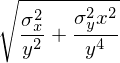

In [17]:
import sympy as sym
sym.init_printing()
#Let's use sympy to evaluate the error with the derivatives:
x,y,sigma_x, sigma_y = sym.symbols('x y \sigma_x \sigma_y')  #declare variables x and y to be used as symbols
F = (x/y) #a function of x and y

dFdx=sym.diff(F,x)
dFdy=sym.diff(F,y)
sigma_F=sym.sqrt((dFdx*sigma_x)**2+(dFdy*sigma_y)**2)
print("Formula for sigma_F from the derivative:")
sigma_F

Formula for sigma_F from the relative uncertainties:


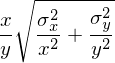

In [18]:
#Using the sum of relative uncertainties:
sigma_F2=F*sym.sqrt((sigma_x/x)**2+(sigma_y/y)**2) 
#And we find that this gives the same result:
print("Formula for sigma_F from the relative uncertainties:")
sigma_F2

In example 4-7, we determine a formula for uncertainty in $F(x,y)=\sin(x+\ln y)$. We can use the same code as above, simply replacing the formula for F:

Formula for sigma_F from the derivative:
 sqrt(\sigma_x**2*cos(x + log(y))**2 + \sigma_y**2*cos(x + log(y))**2/y**2)


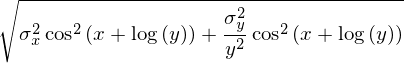

In [40]:
import sympy as sym
sym.init_printing()
#Let's use sympy to evaluate the error with the derivatives:
#Declare variables x and y and their uncertainties as symbols
x,y,sigma_x, sigma_y = sym.symbols('x y \sigma_x \sigma_y')  
#Build a function out of x and y:
F = sym.sin(x+sym.ln(y)) 
#Find the derivatives
dFdx=sym.diff(F,x)
dFdy=sym.diff(F,y)
#Add them in quadrature to have an expression for sigma_F
sigma_F=sym.sqrt((dFdx*sigma_x)**2+(dFdy*sigma_y)**2)
#Print out the result:
print("Formula for sigma_F from the derivative:\n",sigma_F)
#In a notebook, we can just print it out in pretty version:
sigma_F

In [42]:
#Let us now evaluate this numerically.
#Put the tuple of values into a list
values=[(x,3.0),(sigma_x,0.5),(y,8.0),(sigma_y,1.0)]
#Create variables that have the variables subbed into the expressions.
#and evaluate those as numbers:
nValue_F=sym.N(F.subs(values))
nValue_sigmaF=sym.N(sigma_F.subs(values))
#Print the result
print("The best estimate and uncertainty in F(x,y) is {:.2f} +/- {:.2f}".format(
        nValue_F,nValue_sigmaF))


The best estimate and uncertainty in F(x,y) is -0.93 +/- 0.18


In example 4-8, we evaluate the derivative of $F(x,y,z)=\sin(x+\ln y)\cos(z)\sqrt{x^2+y^2+2z}$:

In [44]:
import sympy as sym
sym.init_printing()
#Let's use sympy to evaluate the error with the derivatives:
#Declare variables x, y and z and their uncertainties as symbols
x,y,sigma_x, sigma_y = sym.symbols('x y \sigma_x \sigma_y')  
z,sigma_z = sym.symbols('z \sigma_z')
#Build a function out of x and y:
F=(sym.sin(x+sym.ln(y))*sym.cos(z))*(sym.sqrt(x**2+y**2+2*z))
#Find the derivatives
dFdx=sym.diff(F,x)
dFdy=sym.diff(F,y)
dFdz=sym.diff(F,z)
#Add them in quadrature to have an expression for sigma_F
sigma_F=sym.sqrt((dFdx*sigma_x)**2+(dFdy*sigma_y)**2+(dFdz*sigma_z)**2)
#The result is a little messy to print out...
#print("Formula for sigma_F from the derivative:\n",sigma_F)
#Create an array of tuples for the numerical values:
values=[(x,8),(sigma_x,0.1),(y,3),(sigma_y,0.2),(z,10),(sigma_z,0.3)]
#Create variables that have the variables subbed into the expressions.
#and evaluate those as numbers:
nValue_F=sym.N(F.subs(values))
nValue_sigmaF=sym.N(sigma_F.subs(values))
#Print the result
print("The best estimate and uncertainty in F(x,y,z) is {:.2f} +/- {:.2f}".format(
        nValue_F,nValue_sigmaF))


The best estimate and uncertainty in F(x,y,z) is -2.59 +/- 1.02


## 4.5 Correlated uncertainties
Below, we show how an example of using the covariance between measurements to determine the uncertainty in a sum.


In [1]:
import numpy as np
from math import *
#Copy and paste the data from Table 4.1, add commas by hand
data=np.array([
399.3, 193.2, 592.5,
404.6, 205.1, 609.7,
394.6, 192.6, 587.2,
396.3, 194.2, 590.5,
399.6, 196.6, 596.2,
404.9, 201.0, 605.9,
387.4, 184.7, 572.1,
404.9, 215.2, 620.1,
398.2, 203.6, 601.8,
407.2, 207.8, 615.0])
#Reshape into the correct format
data=data.reshape(10,3)
#Extract the columns:
m1=data[:,0]
m2=data[:,1]
msum=data[:,2]
#Get the mean and standard deviations of the columns:
m1mean=m1.mean() #mean
m1std=m1.std(ddof=1) #std
m2mean=m2.mean() #mean
m2std=m2.std(ddof=1) #std
msmean=msum.mean() #mean
msstd=msum.std(ddof=1) #std
msemean=msstd/sqrt(msum.size) #error on the mean
#Calculate the covariance
cov=((m1-m1mean)*(m2-m2mean)).sum()/(m1.size-1)
#Print out comparisons of the uncertainties
print("m1 = {:.2f} +/- {:.2f}".format(m1mean,m1std))
print("m2 = {:.2f} +/- {:.2f}".format(m2mean,m2std))
print("covariance = {:.2f}".format(cov))
print("Treat as independent measurements: M = {:.2f} +/- {:.2f} (correct)".format(msmean,msemean))
print("Quadrature: M = {:.2f} +/- {:.2f} (underestimate)".format(msmean,sqrt(m1std**2+m2std**2)/sqrt(msum.size)))
print("Sum error: M = {:.2f} +/- {:.2f} (overestimate)".format(msmean,(m1std+m2std)/sqrt(msum.size)))
print("With covariance: M = {:.2f} +/- {:.2f} (correct)".format(msmean,sqrt(m1std**2+m2std**2+2*cov)/sqrt(msum.size)))

m1 = 399.70 +/- 6.01
m2 = 199.40 +/- 8.87
covariance = 45.67
Treat as independent measurements: M = 599.10 +/- 4.54 (correct)
Quadrature: M = 599.10 +/- 3.39 (underestimate)
Sum error: M = 599.10 +/- 4.71 (overestimate)
With covariance: M = 599.10 +/- 4.54 (correct)


We can also plot the $m_2$ vs $m_1$ to visualize the correlation:

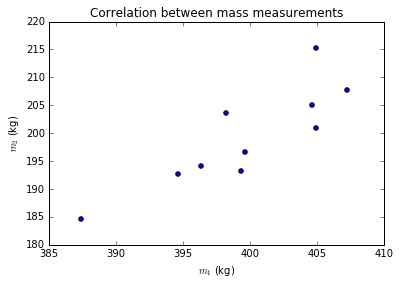

In [2]:
import pylab as pl
%matplotlib inline

pl.scatter(m1,m2)
pl.xlabel('$m_1$ (kg)')
pl.ylabel('$m_2$ (kg)')
pl.title('Correlation between mass measurements')
pl.show()


If the data are anti-correlated, the actual uncertainty in the sum will be smaller than quadrature:


m1 = 397.60 +/- 11.33
m2 = 196.94 +/- 17.14
covariance = -148.24
Treat as independent measurements: M = 594.55 +/- 3.54 (correct)
Quadrature: M = 594.55 +/- 6.50 (overestimate)
Sum error: M = 594.55 +/- 9.00 (overestimate)
With covariance: M = 594.55 +/- 3.54 (correct)


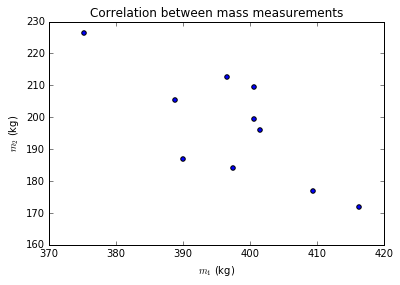

In [3]:
import numpy as np
from math import *
import pylab as pl
%matplotlib inline
#Make some anti-correlated random data:
#m1=np.random.normal(400,10,10)
#m2=np.random.normal(600-m1,10,10)
#msum = m1+m2
# grab the data from table 4.2:
data = np.array([
397.4, 184.1, 581.5,
388.8, 205.4, 594.2,
400.5, 199.4, 599.9,
416.2, 172.0, 588.2,
396.5, 212.7, 609.2,
375.2, 226.4, 601.6,
409.4, 176.9, 586.4,
400.5, 209.6, 610.1,
390.0, 187.0, 577.0,
401.5, 195.9, 597.4])

#Reshape into the correct format
data=data.reshape(10,3)
#Extract the columns:
m1=data[:,0]
m2=data[:,1]
msum=data[:,2]

#Repeat the same analysis:

#Get the mean and standard deviations of the columns:
m1mean=m1.mean() #mean
m1std=m1.std(ddof=1) #std
m2mean=m2.mean() #mean
m2std=m2.std(ddof=1) #std
msmean=msum.mean() #mean
msstd=msum.std(ddof=1) #std
msemean=msstd/sqrt(msum.size) #error on the mean
#Calculate the covariance
cov=((m1-m1mean)*(m2-m2mean)).sum()/(m1.size-1)
#Print out comparisons of the uncertainties
print("m1 = {:.2f} +/- {:.2f}".format(m1mean,m1std))
print("m2 = {:.2f} +/- {:.2f}".format(m2mean,m2std))
print("covariance = {:.2f}".format(cov))
print("Treat as independent measurements: M = {:.2f} +/- {:.2f} (correct)".format(msmean,msemean))
print("Quadrature: M = {:.2f} +/- {:.2f} (overestimate)".format(msmean,sqrt(m1std**2+m2std**2)/sqrt(msum.size)))
print("Sum error: M = {:.2f} +/- {:.2f} (overestimate)".format(msmean,(m1std+m2std)/sqrt(msum.size)))
print("With covariance: M = {:.2f} +/- {:.2f} (correct)".format(msmean,sqrt(m1std**2+m2std**2+2*cov)/sqrt(msum.size)))

pl.scatter(m1,m2)
pl.xlabel('$m_1$ (kg)')
pl.ylabel('$m_2$ (kg)')
pl.title('Correlation between mass measurements')
pl.show()